# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### About the data


http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt
Field Description

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device



Example:
The data below shows the entry/exit register values for one turnstile at control area (A002) from 09/27/14 at 00:00 hours to 09/29/14 at 00:00 hours


C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,00:00:00,REGULAR,0004800073,0001629137,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,04:00:00,REGULAR,0004800125,0001629149,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,08:00:00,REGULAR,0004800146,0001629162,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,12:00:00,REGULAR,0004800264,0001629264,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,16:00:00,REGULAR,0004800523,0001629328,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-27-14,20:00:00,REGULAR,0004800924,0001629371,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-28-14,00:00:00,REGULAR,0004801104,0001629395,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-28-14,04:00:00,REGULAR,0004801149,0001629402,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-28-14,08:00:00,REGULAR,0004801168,0001629414,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-28-14,12:00:00,REGULAR,0004801304,0001629463,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-28-14,16:00:00,REGULAR,0004801463,0001629521,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-28-14,20:00:00,REGULAR,0004801737,0001629555,
A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,09-29-14,00:00:00,REGULAR,0004801836,0001629574,

In [87]:
df = pd.read_csv('turnstile_180901.txt')
df_copy = df
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [88]:
#Your code here
def lowercase(name):
    name=name.lower()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [89]:
old_col = df.columns
new_col = []
for name in old_col:
    new_col.append(name.lower())

new_col
# OR
# new_col = [name.lower() for name in df.columns]

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

In [90]:
df.columns = new_col

In [91]:
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [92]:
#Your code here
df=df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the index back

In [93]:
# Your code here
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [94]:
# Your code here
def countline(text):
    return(len(text))
df['Num_Lines']= df.linename.map(countline)#adding new column 'Num_Lines'
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


In [95]:
df = df.sort_values(['Num_Lines'])

## Write a function to clean a column name

In [96]:
def clean(col_name):#removing white space
#     cleaned = None #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    cleaned =col_name.strip()
    return cleaned
clean('abc     ')

'abc'

In [97]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [98]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

In [99]:
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
98812,F,N528,R257,01-06-01,EAST BROADWAY,IND,08/31/2018,08:00:00,REGULAR,3118060,2484444,1
116031,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/26/2018,12:16:23,REGULAR,32880,599640,1
116030,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/26/2018,08:04:23,REGULAR,32880,599640,1
116029,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/26/2018,03:52:23,REGULAR,32880,599640,1
116028,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/25/2018,23:40:23,REGULAR,32880,599640,1


## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [100]:
#Your code here
df.date.dtype

dtype('O')

In [101]:
df.date=pd.to_datetime(df.date)

In [102]:
df['day'] = df.date.dt.day_name()
#OR
#df.date.dt.dayofweek return '0' for Monday and '6' for Sunday

In [103]:
df = df.rename(columns = {'day':'dayofweek'})#rename the new column
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,dayofweek
98812,F,N528,R257,01-06-01,EAST BROADWAY,IND,2018-08-31,08:00:00,REGULAR,3118060,2484444,1,Friday
116031,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,12:16:23,REGULAR,32880,599640,1,Sunday
116030,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,08:04:23,REGULAR,32880,599640,1,Sunday
116029,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,03:52:23,REGULAR,32880,599640,1,Sunday
116028,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-25,23:40:23,REGULAR,32880,599640,1,Saturday


In [104]:
grouped= df.groupby('dayofweek')
grouped = grouped.sum()
#or oneline code:grouped= df.groupby('dayofweek').sum()

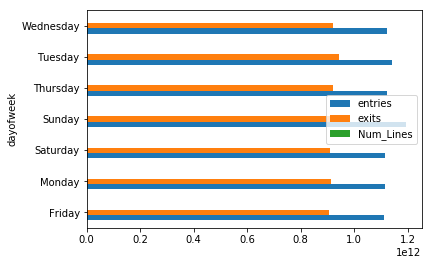

In [105]:
grouped.plot(kind = 'barh')

In [106]:
df['DaybyNum'] = df.date.dt.dayofweek
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,dayofweek,DaybyNum
98812,F,N528,R257,01-06-01,EAST BROADWAY,IND,2018-08-31,08:00:00,REGULAR,3118060,2484444,1,Friday,4
116031,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,12:16:23,REGULAR,32880,599640,1,Sunday,6
116030,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,08:04:23,REGULAR,32880,599640,1,Sunday,6
116029,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,03:52:23,REGULAR,32880,599640,1,Sunday,6
116028,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-25,23:40:23,REGULAR,32880,599640,1,Saturday,5


In [107]:
# df=df.drop('dayofweek',axis = 1)

In [108]:
grouped2= df.groupby('DaybyNum').sum()

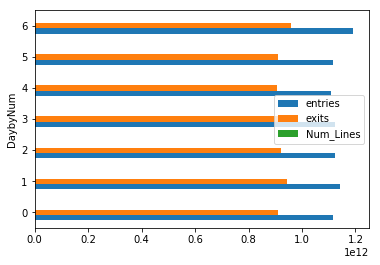

In [109]:
grouped2.plot(kind = 'barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [110]:
#Your code here
grouped = grouped.reset_index()
# type(grouped)
grouped.head()

,dayofweek,entries,exits,Num_Lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607


In [113]:
#Your code here
grouped2 = grouped2.reset_index()
# type(grouped)
grouped2.head()

,DaybyNum,entries,exits,Num_Lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573


In [119]:
#adding new column
grouped2['IsWeekend'] = grouped2.DaybyNum.map({0:False, 1:False, 2:False, 3:False, 4:False, 5:False, 6:True, 7:True})
wknd= grouped.groupby('IsWeekend').mean()#group by IsWeekend and calculate mean
wknd.head()

,entries,exits,Num_Lines
IsWeekend,,,
False,1.133078e+12,9.250043e+11,75937.333333
True,1.123655e+12,9.206309e+11,75713.000000


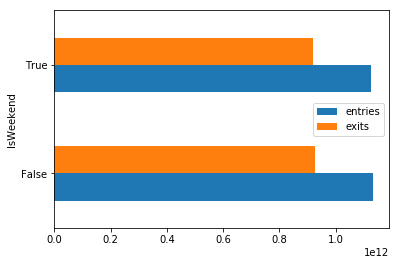

In [120]:
wknd[['entries','exits']].plot(kind = 'barh')

### What not to do: 

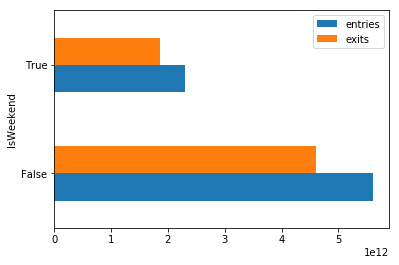

In [122]:
# What Not To Do
grouped2['IsWeekend'] = grouped2.DaybyNum.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
#Since number of days in a week is more than number of days in a weekend, comparing summed values do not make sense
wkend = grouped2.groupby('IsWeekend').sum()

wkend[['entries', 'exits']].plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

#### Answer: The raw data for entries/exits is cumulative. As such, you would first need to order the data by time and station, and then calculate the difference in order to produce meaningful aggregations.

## Drop a couple of columns

In [123]:
# Your code here
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,dayofweek,DaybyNum
98812,F,N528,R257,01-06-01,EAST BROADWAY,IND,2018-08-31,08:00:00,REGULAR,3118060,2484444,1,Friday,4
116031,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,12:16:23,REGULAR,32880,599640,1,Sunday,6
116030,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,08:04:23,REGULAR,32880,599640,1,Sunday,6
116029,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-26,03:52:23,REGULAR,32880,599640,1,Sunday,6
116028,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,2018-08-25,23:40:23,REGULAR,32880,599640,1,Saturday,5


In [125]:
df3 = df.drop(['c/a','scp'], axis = 1)
df3.head()

,linename,unit,station,division,date,time,desc,entries,exits,Num_Lines,dayofweek,DaybyNum
98812,F,R257,EAST BROADWAY,IND,2018-08-31,08:00:00,REGULAR,3118060,2484444,1,Friday,4
116031,1,R542,TWENTY THIRD ST,PTH,2018-08-26,12:16:23,REGULAR,32880,599640,1,Sunday,6
116030,1,R542,TWENTY THIRD ST,PTH,2018-08-26,08:04:23,REGULAR,32880,599640,1,Sunday,6
116029,1,R542,TWENTY THIRD ST,PTH,2018-08-26,03:52:23,REGULAR,32880,599640,1,Sunday,6
116028,1,R542,TWENTY THIRD ST,PTH,2018-08-25,23:40:23,REGULAR,32880,599640,1,Saturday,5


## Summary

Great! You practiced your data cleanup-skills using Pandas.